In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [4]:
query = """
    SELECT p.name, p.price, oi.quantity, o.datetime
    FROM restaurant_orderitem AS oi
    INNER JOIN restaurant_order AS o
    ON o.id = oi.order_id
    INNER JOIN restaurant_product AS p
    ON p.id = oi.product_id
"""

with sqlite3.connect("../db.sqlite3") as conn:
    orders = pd.read_sql_query(query, conn)
    
orders.to_csv("restaurant_data.csv", index=False)

In [8]:
df = pd.read_csv("restaurant_data.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      74818 non-null  object        
 1   price     74818 non-null  float64       
 2   quantity  74818 non-null  int64         
 3   datetime  74818 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.3+ MB


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

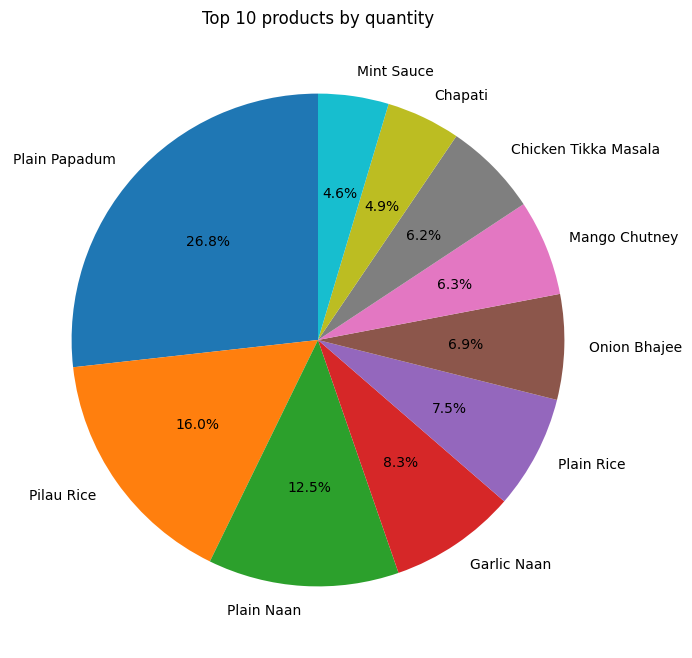

In [20]:
top_10_by_quantity = df.groupby("name").agg({"quantity": "sum"}).sort_values(by="quantity", ascending=False)[:10]

plt.figure(figsize=(12, 8))
plt.pie(top_10_by_quantity["quantity"], labels=top_10_by_quantity.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 10 products by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

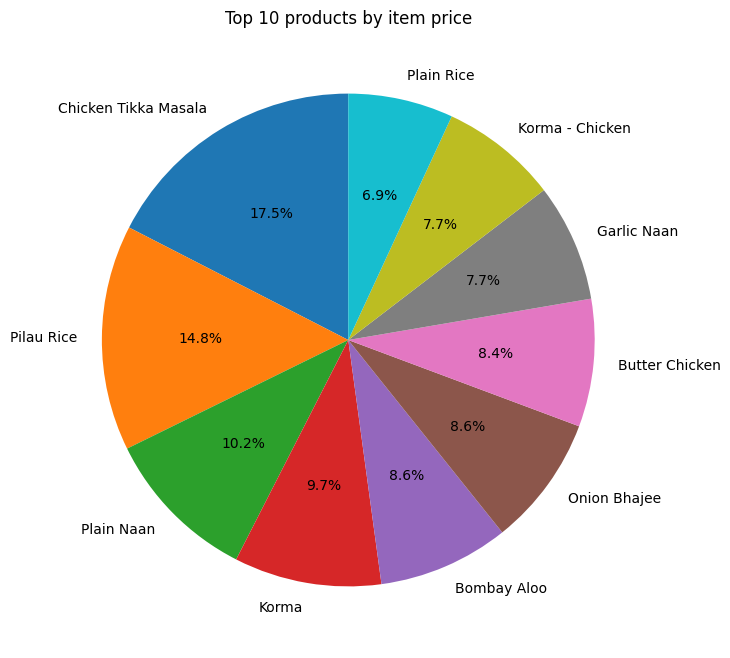

In [30]:
df["item_price"] = df["price"] * df["quantity"]

top_10_by_item_price = df.groupby("name").agg({"item_price": "sum"}).sort_values(by="item_price", ascending=False)[:10]

plt.figure(figsize=(12, 8))
plt.pie(top_10_by_item_price["item_price"], labels=top_10_by_item_price.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 10 products by item price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

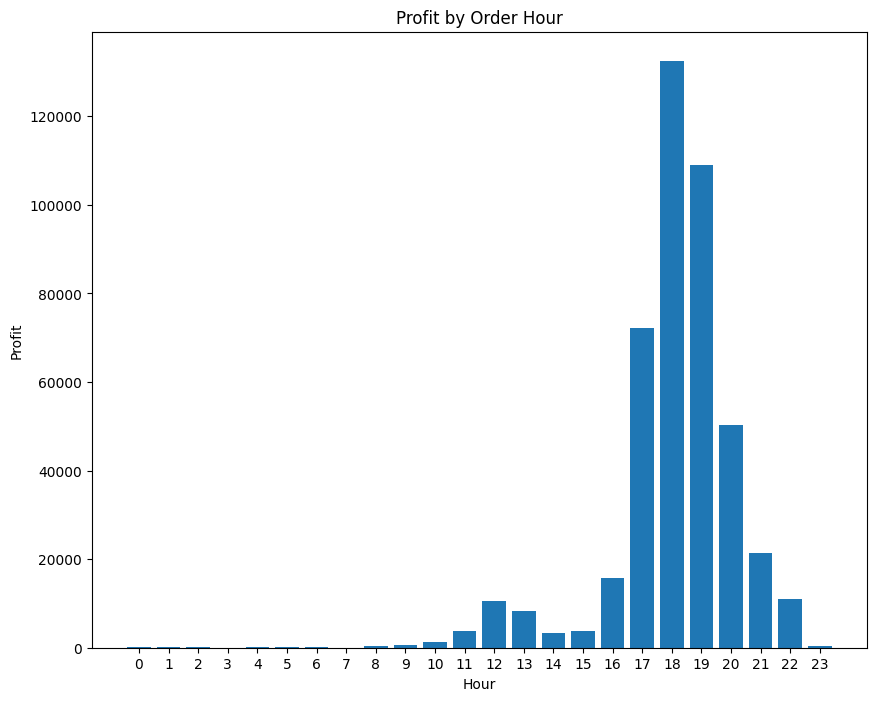

In [40]:
df["order_hour"] = df["datetime"].dt.hour
profit_by_order_hour = df.groupby("order_hour").agg({"item_price": "sum"})

plt.figure(figsize=(10, 8))
plt.bar(profit_by_order_hour.index, profit_by_order_hour["item_price"])
plt.title("Profit by Order Hour")
plt.xlabel("Hour")
plt.ylabel("Profit")
plt.xticks(np.arange(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

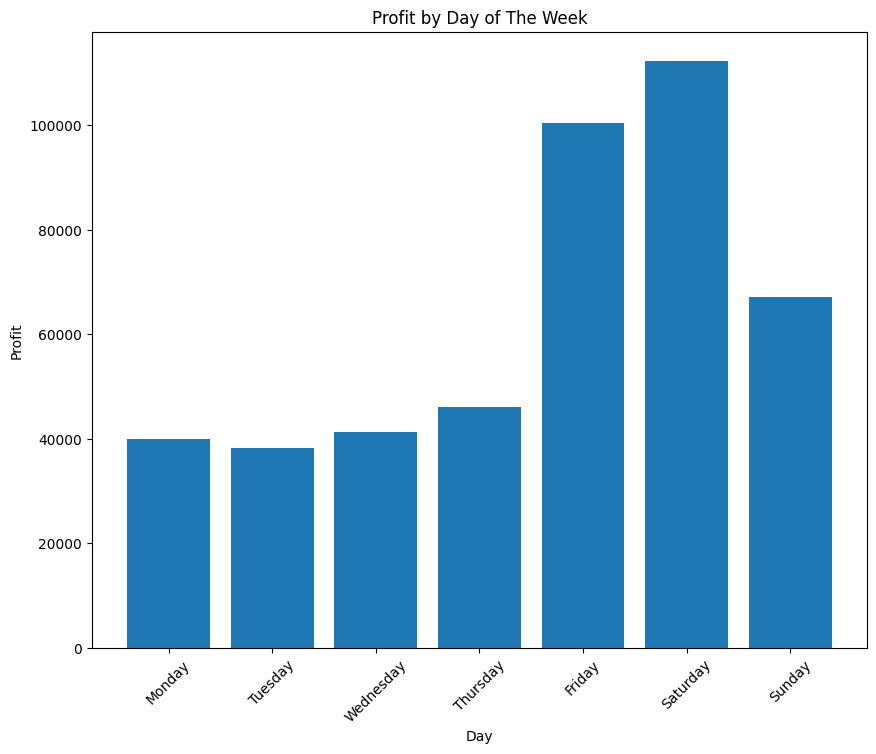

In [42]:
day_map = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["order_day"] = df["datetime"].dt.day_name()

profit_by_order_day = df.groupby("order_day").agg({"item_price": "sum"}).reindex(day_map)

plt.figure(figsize=(10, 8))
plt.bar(profit_by_order_day.index, profit_by_order_day["item_price"])
plt.title("Profit by Day of The Week")
plt.xlabel("Day")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()